In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from src.attractor_model import *

# Introduction

## A simple firing-rate model of working memory and decision-making

Consider two excitatory neural assemblies, populations $1$ and $2$, that compete with each other through a shared pool of 
inhibitory neurons.

Let $r_1$ and $r_2$ be their respective population-firing rates, and the total synaptic input current $I_i$ and the resulting firing rate $r_i$ of the neural population $i$ obey the following input-output relationship ($F - I$ curve):

$$
r_i = F(I_i) = \frac{aI_i - b}{1-\exp(-d(aI_i-b))}
$$

which captures the current-frequency function of a leaky integrate-and-fire neuron. The parameter values are $a$ = 270 Hz/nA, $b$ = 108 Hz, $d$ = 0.154 sec.

Assume that the 'synaptic drive variables' $S_1$ and $S_2$ obey

\begin{align}
\frac{dS_1}{dt} &= F(I_1)\,\gamma(1-S_1)-S_1/\tau_s\\
\frac{dS_2}{dt} &= F(I_2)\,\gamma(1-S_2)-S_2/\tau_s
\end{align}

where $\gamma$ = 0.641. The net current into each population is given by 

\begin{align}
I_1 &= J_E s_1 + J_I s_2 + I_{b1} + J_{ext}\mu_1\\
I_2 &= J_E s_2 + J_I s_1 +I_{b2} +J_{ext}\mu_2.
\end{align}


The synaptic time constant is $\tau_s$ = 100 ms. The synaptic coupling strengths are $J_E$ = 0.2609 nA, $J_I$ = -0.0497 nA, and $J_{ext}$ = 0.00052 nA. Stimulus-selective inputs to populations 1 and 2 are governed by unitless parameters $\mu_1$ and $\mu_2$, respectively. $I_b$ is the background input which has a mean $I_0$ and a noise component described by an Ornstein-Uhlenbeck process:

\begin{align}
dI_{b1} &= (I_0 - I_{b1}) \frac{dt}{\tau_0} + \sigma dW \\
dI_{b2} &= (I_0 - I_{b2}) \frac{dt}{\tau_0} + \sigma dW \\
\end{align}

where $I_0=0.3255$ nA, filter time constant $\tau_0=2$ ms, and noise amplitude $\sigma=0.02$ nA. $dW$ is a Wiener process and note that when numerially integrating that with step size $\frac{dt}{\tau_0}$ then $\Delta W \sim \mathcal{N}(0, \frac{dt}{\tau_0})$, a normal distribution with mean 0 and variance $\frac{dt}{\tau_0}$

For the decision-making paradigm, the input rates $\mu_1$ and $\mu_2$ are determined by the stimulus coherence $c'$ which ranges between 0 (0%) and 1 (100%):

\begin{align}
\mu_1 &=\mu_0(1+c')\\
\mu_2 &=\mu_0(1-c')
\end{align}


*References:*
* Wong K-F and Wang X-J (2006). A recurrent network mechanism for time integration in perceptual decisions. J. Neurosci 26, 1314-1328.

## Prerequisites
- working memory and decision making tasks
- Wong-Wang model
- dynamical systems theory: phase space, nullclines, fixed points
- basic Python skills

## Objectives
- get familiar with attractor model
    - understand how working memory items and their robustness against distractors are represented in the attractor model
    - understand how decisions are made, as well as how performance and reaction times of a decision task can be evaluated in the attractor model

# Attractor model code

We provide code for simulating and analyzing the attractor model, cf. `attractor_model.py` in the `src` folder.

- Familiarize yourself with the code, make sure you understand that it solves the above model equations and what the provided analysis functions do. Note also the following demonstration for how to use the code.

## Demonstration how to use the code

Let's simulate the model for working memory or decision making

- Initialize the parameters
- set the number of trials to 10
- run the simulation in working memory (`WM`) mode

Hint: `default_pars`, `default_expt_pars`, `run_sim`

```
# Initialize parameters with default values
pars = default_pars()
expt_pars = default_expt_pars()

# Modify any parameters
#pars['coh'] = 0 # zero coherence for decision making
expt_pars['Ntrials'] = 10

results = run_sim(pars,expt_pars,expt='WM') # expt = 'WM' for working memory, 'DM' for decision making'
```

Plot the firing rates of the two populations in the network for all trials.

Hint: `r?smooth` in the `results` dictionary

```
for i in xrange(expt_pars['Ntrials']):
    plt.plot(results['t'], results['r1smooth'][i], c='r', alpha=0.5)
    plt.plot(results['t'], results['r2smooth'][i], c='b', alpha=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Firing rate [Hz]')
```

![Example trajectory](fig/example_trajectory.png)

Let's also plot the temporal activity of the network in the ($S_1$,$S_2$) phase plane:

```
for i in xrange(expt_pars['Ntrials']):
    plt.plot(results['S2'][i], results['S1'][i])
plt.xlabel('$S_2$')
plt.ylabel('$S_1$')

plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.gca().set_aspect('equal')
```

![Example trajecotory in S plane](fig/example_trajectory_Splane.png)

Plot the phase plane for a few different conditions, e.g.: 
* No stimulus ($\mu_1 = 0$ Hz)
* Weak stimulus ($\mu_1 = 5$ Hz)
* Moderate stimulus ($\mu_1 = 20$ Hz)
* Strong stimulus ($\mu_1 = 50$ Hz)

What's going on?

```
fig,axs = plt.subplots(2,2, figsize=(20,20))
pars = default_pars()

for ax,mu in zip(axs.flat,[0,5,20,50]):
    pars['mu1'] = mu
    plot_phase_plane(pars,expt='WM', ax=ax)
    ax.set_title('mu={mu}'.format(mu=mu))
```

![Example phase plane](fig/example_phase_plane.png)

Now consider decision making (expt='DM').

# Exercise: Decision Making

**1.** Plot the phase plane for a few different conditions, e.g.: 
* No stimulus ($\mu_0 = 0$)
* With 0% coherence stimulus
* With 12.8% coherence stimulus
* With 100% coherence stimulus

How does the stimulus shape the 'attractor landscape' in the plase plane? Relate this to the sampled network trajectories under these conditions.

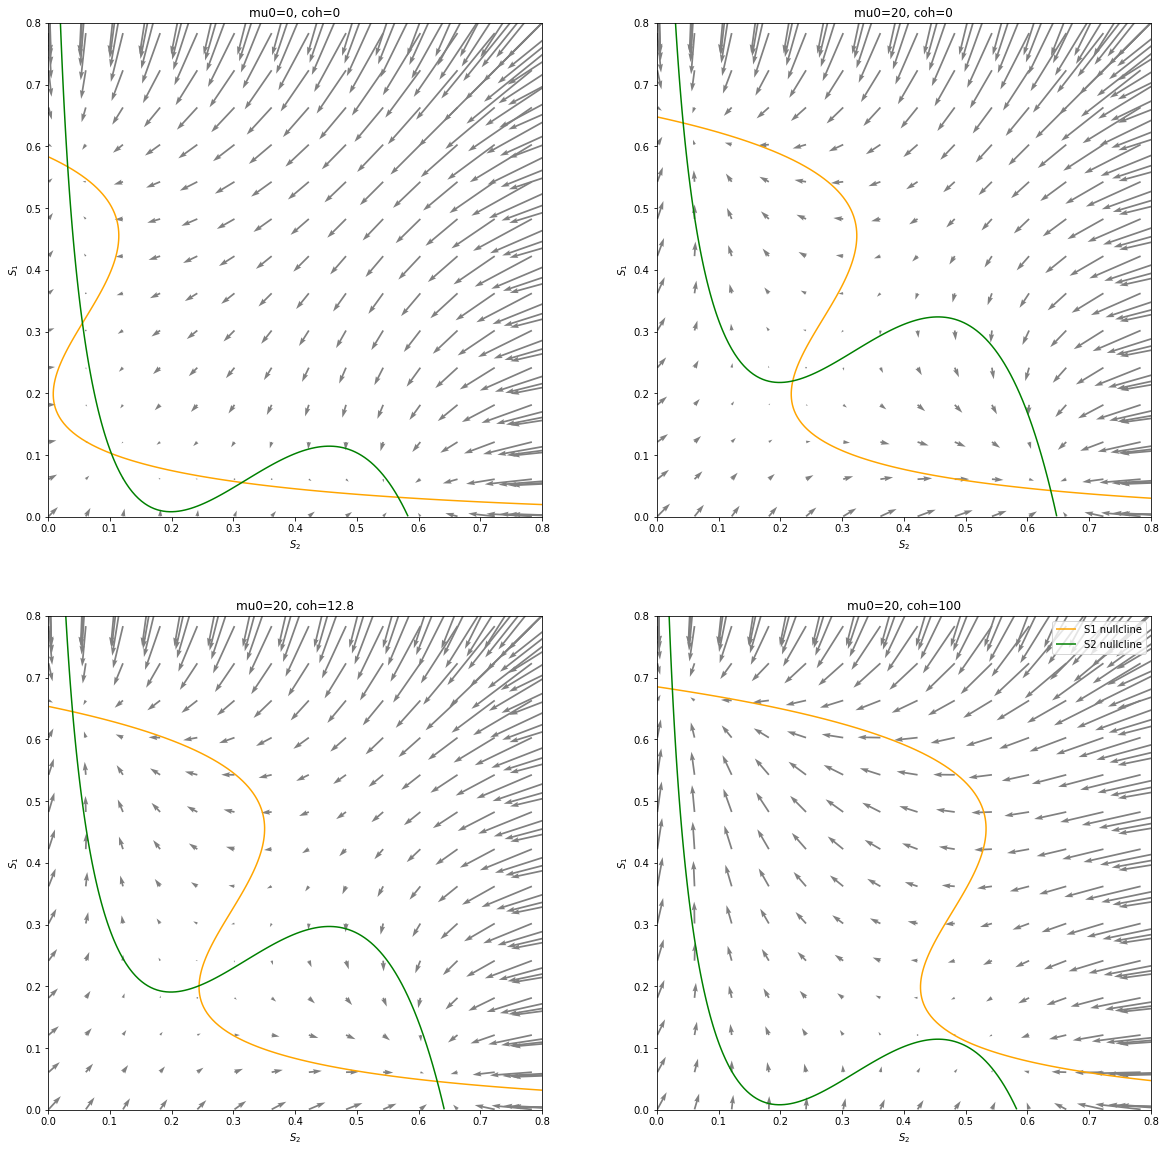

In [31]:
fig,axs = plt.subplots(2,2, figsize=(20,20))
pars = default_pars()

for ax, mu0, coh in zip(axs.flat, [0, 20, 20, 20], [0, 0, 12.8, 100]):
    pars['mu0'] = mu0
    pars['coh'] = coh
    plot_phase_plane(pars,expt='DM', ax=ax)
    ax.set_title('mu0={mu0}, coh={coh}'.format(mu0 = mu0, coh = coh))
plt.show()

**2.** 'Coin-tossing' simulations with $\mu_1=\mu_2=\mu_0=30$ and $c'=0$. In a decision-making simulation, both $\mu_1$ and $\mu_2$ are presented for 1 sec starting at 0.5 sec into the simulation, and your total simulation time should be much longer (say 3 sec). The decision choice is determined according to
which of the two active attractors wins the competition.

Display time courses of $S_1(t)$ and $S_2(t)$, as well as firing rates $r_1(t)=F(I_1)$ and $r_2(t)=F(I_2)$. Also, plot $s_1$ against $s_2$, or $r_1$ against $r_2$ in the `phase space'. 

In different ($n$) trials, each with a different seed for the random number generator, but always with the same initial condition 
($s_1=s_2=0.1$), what do you observe? Do you see 50-50 decision outcome if $n$ is large, say n=100-500? 

In [32]:
pars = default_pars()
expt_pars = default_expt_pars()
pars['mu0'] = 30
pars["coh"] = 0
expt_pars['Ntrials'] = 10
expt_pars['Ttotal'] = 3
expt_pars['Tdur'] = 1
expt_pars['Tstim'] = 0.5

results = run_sim(pars, expt_pars, expt = 'DM')

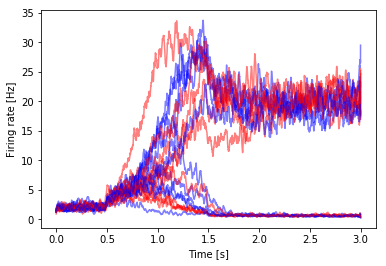

In [33]:
for i in xrange(expt_pars['Ntrials']):
    plt.plot(results['t'], results['r1smooth'][i], c='r', alpha=0.5)
    plt.plot(results['t'], results['r2smooth'][i], c='b', alpha=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Firing rate [Hz]')
plt.show()

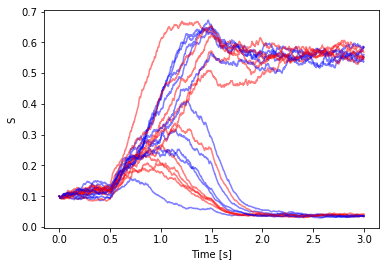

In [34]:
for i in xrange(expt_pars['Ntrials']):
    plt.plot(results['t'], results['S1'][i][:-1], c='r', alpha=0.5)
    plt.plot(results['t'], results['S2'][i][:-1], c='b', alpha=0.5)
plt.xlabel('Time [s]')
plt.ylabel('S')
plt.show()

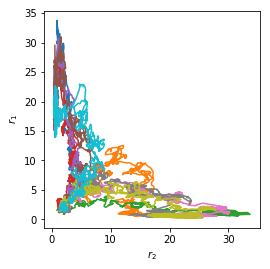

In [35]:
for i in xrange(expt_pars['Ntrials']):
    plt.plot(results['r1smooth'][i], results['r2smooth'][i])
plt.xlabel('$r_2$')
plt.ylabel('$r_1$')

plt.gca().set_aspect('equal')
plt.show()

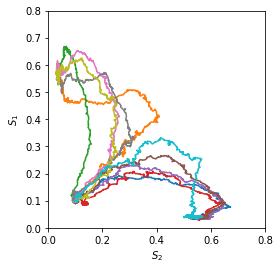

In [36]:
for i in xrange(expt_pars['Ntrials']):
    plt.plot(results['S2'][i], results['S1'][i])
plt.xlabel('$S_2$')
plt.ylabel('$S_1$')

plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.gca().set_aspect('equal')
plt.show()

**3.** Plot the 'psychometric function', namely the percentage of correct decisions (choice==1 is correct if $c'>0$) as a function of $\log(c')$, sampled at $c'=1.0\%, 3.2\%,6.4\%,12.8\%,25.6\%,51.2\%,100\%$. 

/opt/conda/envs/py2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


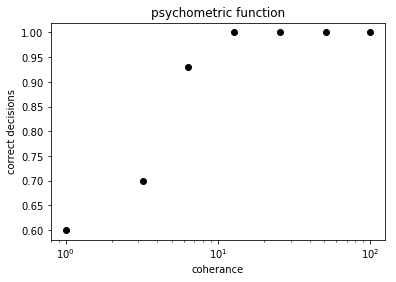

In [37]:
pars = default_pars()
expt_pars = default_expt_pars()
pars['mu0'] = 40
expt_pars['Ntrials'] = 100

for c in [1, 3.2, 6.4, 12.8, 25.6, 51.2, 100]:
    pars["coh"] = c
    results = run_sim(pars, expt_pars, expt = 'DM')
    correct = np.sum(results["r1smooth"][i][-1] > results["r2smooth"][i][-1] for i in range(expt_pars['Ntrials'])) / expt_pars['Ntrials']
    plt.plot(c, correct, "ko")
    plt.xscale("log")
    
plt.xlabel("coherance")
plt.ylabel("correct decisions")
plt.title("psychometric function")
plt.show()

**4.** Reaction time task. Set a firing threshold (e.g. $\theta=15$ Hz, but adjust it if necessary). 
In any trial,  the decision is made whenever one of the two neural populations reaches this threshold first. 
Run simulations over many trials for each $c'$ as in (2). 

**4a.** Show sample time courses of firing rates for different coherence levels. 

**4b.** Plot the trial-averaged reaction time as a function of $\log(c')$.

In [44]:
def reactiontime(r1, r2, theta):
    for t in range(len(r1)):
        if r1[t] >= theta or r2[t] >= theta:
            return t
    return t

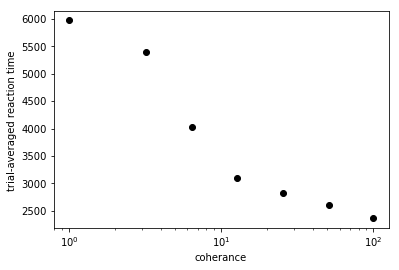

In [45]:
pars = default_pars()
expt_pars = default_expt_pars()
expt_pars['Ntrials'] = 10

for c in [1, 3.2, 6.4, 12.8, 25.6, 51.2, 100]:
    pars["coh"] = c
    results = run_sim(pars, expt_pars, expt = 'DM')
    reaction_time = np.sum(reactiontime(results["r1"][i], results["r1"][i], 15) for i in range(expt_pars['Ntrials'])) / expt_pars['Ntrials'] 
    plt.plot(c, reaction_time, "ko")
    plt.xscale("log")
    
plt.xlabel("coherance")
plt.ylabel("trial-averaged reaction time ")
plt.show()

# [Small project] Working Memory

**1a.** With initial condition $s_1= s_2 =0$, and without external input, show that the system settles into a resting state. Determine the firing rate at that state.

**1b.** Use a brief (300 ms) positive current to one population. When this amplitude is sufficiently large, show that a persistent activity is produced that outlasts the transient input. What is the firing rate of the persistent activity? 

**1c.** What is the critical input strength?

In [ ]:
pars = default_pars()

plt.subplot(1, 3, 1)
pars["mu1"] = 0
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g" % pars["mu1"] )

plt.subplot(1, 3, 2)
pars["mu1"] = 7
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g" % pars["mu1"] )

plt.subplot(1, 3, 3)
pars["mu1"] = 8
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g" % pars["mu1"] )

plt.savefig("1.png")
plt.show()

**2a.** Decrease the value of $J_E$ incrementally (e.g. by steps of 0.01 nA), and show that persistent activity disappears when the recurrent excitation is below a critical value. What is this critical level of recurrent excitation?

**2b.** Increase the value of $J_E$ incrementally (by steps of 0.01 nA), and show that the low-rate resting state is lost when the recurrent excitation is above a critical value. What is this critical level of $J_E$?

**2c.** Plot the nullclines for $s_1$ and $s_2$ (i.e. the curves where $\frac{ds_1}{dt}=0$ or $\frac{ds_2}{dt}=0$) in the $\{s_1,s_2\}$ phase space for various values of $J_E$ to explain the transitions between dynamical regimes (bifurcations) around these critical values of $J_E$.

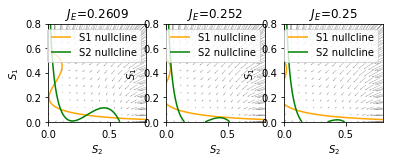

In [177]:
pars = default_pars()
pars["mu1"] = pars["mu2"] = 0

plt.subplot(1, 3, 1)
plot_phase_plane(pars, expt = 'WM')
plt.title("$J_{E}$=%g" % pars["JE"] )

plt.subplot(1, 3, 2)
pars["JE"] = 0.252
plot_phase_plane(pars, expt = 'WM')
plt.title("$J_{E}$=%g" % pars["JE"] )

plt.subplot(1, 3, 3)
pars["JE"] = 0.250
plot_phase_plane(pars, expt = 'WM')
plt.title("$J_{E}$=%g" % pars["JE"] )

plt.savefig("2-decrease.png")
plt.show()

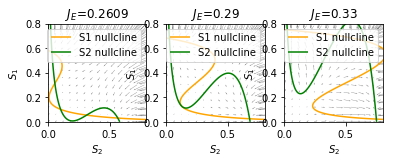

In [18]:
pars = default_pars()
pars["mu1"] = pars["mu2"] = 0

plt.subplot(1, 3, 1)
plot_phase_plane(pars, expt = 'WM')
plt.title("$J_{E}$=%g" % pars["JE"] )

plt.subplot(1, 3, 2)
pars["JE"] = 0.29
plot_phase_plane(pars, expt = 'WM')
plt.title("$J_{E}$=%g" % pars["JE"] )

plt.subplot(1, 3, 3)
pars["JE"] = 0.33
plot_phase_plane(pars, expt = 'WM')
plt.title("$J_{E}$=%g" % pars["JE"] )

plt.savefig("2-increase.png")
plt.show()

**3.** Explore the effect of subsequent pulses applied during the delay, after one population is activated to the persistent state. 

**3a.** Show that persistent activity can be switched off with a second brief (300 ms) current of negative value to the active population. Visualize the nullclines for $s_1$ and $s_2$ for this input configuration.

**3b.** Find a way to switch the network back to the low baseline state using only excitatory input. Can you explain this in terms of `basins of attraction'?

**3c.** Model the effect of a distractor
- Apply an input to the other population. 
- Is the network robust against distraction? 
- Find the threshold on input strength for distraction. 
- Visualize the nullclines for $s_1$ and $s_2$ for various values of stimulus current strength. Explain the transition between robustness and vulnerability to distractors.
- Now change the strength of recurrent excitation $J_E$ or inhibition $J_I$. How do these parameters affect the distractibility threshold?

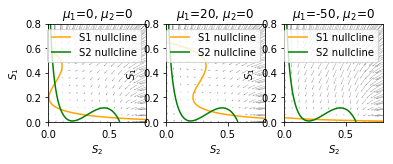

In [11]:
pars = default_pars()

plt.subplot(1, 3, 1)
pars["mu1"] = 0
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g, $\mu_{2}$=%g" % (pars["mu1"], pars["mu2"]) )

plt.subplot(1, 3, 2)
pars["mu1"] = 20
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g, $\mu_{2}$=%g" % (pars["mu1"], pars["mu2"]) )

plt.subplot(1, 3, 3)
pars["mu1"] = -50
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g, $\mu_{2}$=%g" % (pars["mu1"], pars["mu2"]) )

plt.savefig("3-negative.png")
plt.show()

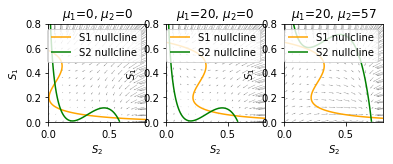

In [12]:
pars = default_pars()

plt.subplot(1, 3, 1)
pars["mu1"] = 0
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g, $\mu_{2}$=%g" % (pars["mu1"], pars["mu2"]) )

plt.subplot(1, 3, 2)
pars["mu1"] = 20
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g, $\mu_{2}$=%g" % (pars["mu1"], pars["mu2"]) )

plt.subplot(1, 3, 3)
pars["mu2"] = 57
plot_phase_plane(pars, expt = 'WM')
plt.title("$\mu_{1}$=%g, $\mu_{2}$=%g" % (pars["mu1"], pars["mu2"]) )

plt.savefig("3-positive.png")
plt.show()